In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from termcolor import colored

face_cascade = cv2.CascadeClassifier('/home/mckc/Downloads/opencv-2.4.13/data/haarcascades_GPU/haarcascade_frontalface_default.xml')

In [2]:
def load_data():
    import pandas as pd
    import numpy as np
    from PIL import Image
    import cv2 
    from skimage.transform import resize
    
    train = pd.read_csv('/home/mckc/External/train.csv')
    test = pd.read_csv('/home/mckc/External/test.csv')
    print 'the training data shape is ',train.shape
    print 'the test data shape is ', test.shape
    
    train_faces = np.zeros((1,96,96),dtype=np.uint8)
    Y_train=[]
    missing = []
    multiple = []
    for i in range(train.shape[0]):
        image = np.array(cv2.imread(train.values[i,0], cv2.CV_LOAD_IMAGE_GRAYSCALE))
        #print image
        faces  = face_cascade.detectMultiScale(image,scaleFactor=1.2,minNeighbors=6,minSize=(70, 70))
        n_faces = len(faces)
        if n_faces is 1:
            for (x,y,w,h) in faces:
                fac = np.array(image)[y:(y+h),x:(x+h)]
                out = (resize(fac,(96,96))).reshape((1,96,96))
                train_faces = np.vstack((train_faces,out))
                Y_train = np.append(Y_train,train.values[i,1])
        else:
            if n_faces > 1:
                missing = np.append(missing,i)
            else:
                multiple = np.append(multiple,i)
        if i % 50==0:
            print colored((float(i)/train.shape[0]*100 ,' Percentage complete'), 'green')
    print 'missing count:',len(missing),'\nmuiltiple images count',len(multiple)
    train_faces = train_faces[1:,:,:]
    
    test_faces = np.zeros((1,96,96),dtype=np.uint8)
    Y_test = []
    file_names = []
    for i in range(test.shape[0]):
        image = np.array(cv2.imread(test.values[i,0], cv2.CV_LOAD_IMAGE_GRAYSCALE))
        faces  = face_cascade.detectMultiScale(image,scaleFactor=1.2,minNeighbors=6,minSize=(70, 70))
        n_faces = len(faces)
        if n_faces is 1:
            for (x,y,w,h) in faces:
                fac = np.array(image)[y:(y+h),x:(x+h)]
                out = (resize(fac,(96,96))).reshape((1,96,96))
                test_faces = np.vstack((test_faces,out))
                Y_test = np.append(Y_test,test.values[i,1])
                file_names = np.append(file_names,test.values[i,0])
        else:
            if n_faces > 1:
                missing = np.append(missing,i)
            else:
                multiple = np.append(multiple,i)
        if i % 50==0:
            print colored((float(i)/train.shape[0]*100 ,' Percentage complete'), 'green')
    test_faces = test_faces[1:,:,:]
    print len(missing),len(multiple)
    
    print 'the training file shape',train_faces.shape,Y_train.shape
    print 'the testing file shape',test_faces.shape,Y_test.shape
    
    return train_faces,test_faces,Y_train,Y_test,file_names

In [3]:
def simulate(X,Y):
    import scipy as sp
    import scipy.ndimage
    complete = np.zeros((1,96,96),dtype=np.uint8)
    Y_complete = []
    for i in range(len(X)):
        complete = np.vstack((complete,X[i,:,:].reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(X[i,:,:], angle = 5,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(X[i,:,:], angle = 10,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(X[i,:,:], angle = 15,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(X[i,:,:], angle = -5,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(X[i,:,:], angle = -15,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(X[i,:,:], angle = -10,reshape=False,cval=1).reshape(1,96,96)))
        rotated = np.fliplr(X[i,:,:])
        complete = np.vstack((complete,scipy.ndimage.rotate(rotated, angle = 5,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(rotated, angle = 10,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(rotated, angle = 15,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(rotated, angle = -5,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(rotated, angle = -10,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(rotated, angle = -15,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,rotated.reshape(1,96,96)))
        Y_complete = np.append(Y_complete,([Y[i]]*14))
        if i % 50==0:
            print colored((float(i)/len(X)*100 ,' Percentage complete'),'green')
    complete = complete[1:,:,:]
    return complete,Y_complete

In [4]:
X_tr,X_tst,Y_tr,Y_tst,file_names = load_data()

the training data shape is  (594, 2)
the test data shape is  (196, 2)
(0.0, ' Percentage complete')
(8.417508417508419, ' Percentage complete')
(16.835016835016837, ' Percentage complete')
(25.252525252525253, ' Percentage complete')
(33.670033670033675, ' Percentage complete')
(42.08754208754209, ' Percentage complete')
(50.505050505050505, ' Percentage complete')
(58.92255892255892, ' Percentage complete')
(67.34006734006735, ' Percentage complete')
(75.75757575757575, ' Percentage complete')
(84.17508417508418, ' Percentage complete')
(92.5925925925926, ' Percentage complete')
missing count: 33 
muiltiple images count 47
(0.0, ' Percentage complete')
(8.417508417508419, ' Percentage complete')
(16.835016835016837, ' Percentage complete')
(25.252525252525253, ' Percentage complete')
45 57
the training file shape (514, 96, 96) (514,)
the testing file shape (174, 96, 96) (174,)


In [5]:
import time
start_time = time.clock()
X,Y = simulate(X_tr,Y_tr)
print X.shape,Y.shape
print time.clock() - start_time, "seconds"

(0.0, ' Percentage complete')
(9.72762645914397, ' Percentage complete')
(19.45525291828794, ' Percentage complete')
(29.18287937743191, ' Percentage complete')
(38.91050583657588, ' Percentage complete')
(48.63813229571984, ' Percentage complete')
(58.36575875486382, ' Percentage complete')
(68.09338521400778, ' Percentage complete')
(77.82101167315176, ' Percentage complete')
(87.54863813229572, ' Percentage complete')
(97.27626459143968, ' Percentage complete')
(7196, 96, 96) (7196,)
270.684059 seconds


In [6]:
def standard(X):
    return (X - X.mean())/X.max()

In [7]:
X_test = standard(X_tst)
X = standard(X)

In [8]:
X_normal = X.reshape(-1,9216)
X_test_normal = X_test.reshape(-1,9216)
map, Y_number = np.unique(Y, return_inverse=True)
Y_test_numer = np.unique(Y_tst, return_inverse=True)[1]

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [10]:
clf = LogisticRegression(verbose=0,n_jobs=-1)
clf.fit(X_normal,Y_number)
Y_logictic= clf.predict(X_test.reshape(-1,9216))

Y_log_vales = map[Y_logictic]

print 'Accuracy of the model is ',accuracy_score(Y_tst,Y_log_vales)
confusion_matrix(Y_log_vales,Y_tst)

Accuracy of the model is  0.98275862069


array([[21,  0,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0],
       [ 1,  0, 25,  0,  0,  0,  0],
       [ 0,  0,  0, 24,  0,  0,  0],
       [ 0,  0,  0,  0, 26,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  1],
       [ 0,  0,  0,  0,  0,  1, 37]])

In [11]:
recognizer = RandomForestClassifier(500,verbose=0,oob_score=True,n_jobs=-1)
recognizer.fit(X_normal,Y_number)

Y_rf= recognizer.predict(X_test.reshape(-1,9216))
Y_rf_vales = map[Y_rf]

print 'Accuracy of the model is ',accuracy_score(Y_tst,Y_rf_vales)
confusion_matrix(Y_tst,Y_rf_vales)

Accuracy of the model is  0.936781609195


array([[21,  0,  1,  0,  0,  0,  0],
       [ 4, 16,  0,  0,  0,  0,  0],
       [ 0,  0, 25,  0,  0,  0,  0],
       [ 0,  0,  0, 24,  0,  0,  0],
       [ 4,  0,  0,  0, 22,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  1],
       [ 0,  0,  0,  0,  0,  1, 37]])

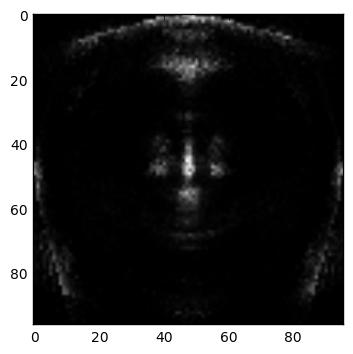

In [12]:
importances = recognizer.feature_importances_
importance_image = importances.reshape(96,96)
#plt.figure(figsize=(7,7))
plt.imshow(importance_image,cmap=cm.Greys_r)

In [14]:
for i in range(len(Y_test_numer)):
    print file_names[i],Y_log_vales[i]

/home/mckc/External/Kinkar_4.jpg Kinkar
/home/mckc/External/Pandian_with_specs_5.jpg Pandian
/home/mckc/External/Kinkar_31.jpg Kinkar
/home/mckc/External/Gopika_13.jpg Gopika
/home/mckc/External/Abhay_16.jpg Abhay
/home/mckc/External/Gopika_specs_cap_13.jpg Gopika
/home/mckc/External/Abhay_specs_8.jpg Abhay
/home/mckc/External/Sharath_cap_8.jpg Sharath
/home/mckc/External/Gopika_mobile_5.jpg Gopika
/home/mckc/External/Sharath_spec_2.jpg Sharath
/home/mckc/External/Gopika_mobile_12.jpg Gopika
/home/mckc/External/Arun_with_specs_10.jpg Arun
/home/mckc/External/Gopika_specs_cap_3.jpg Gopika
/home/mckc/External/Gopika_37.jpg Gopika
/home/mckc/External/Kinkar_with_cap_and_specs_5.jpg Kinkar
/home/mckc/External/Sharath_30.jpg Sharath
/home/mckc/External/Abhay_23.jpg Abhay
/home/mckc/External/Omar_without_specs18.jpg Omar
/home/mckc/External/Arun_19.jpg Arun
/home/mckc/External/Gopika_39.jpg Gopika
/home/mckc/External/Omar_with_mobile16.jpg Omar
/home/mckc/External/Arun_16.jpg Arun
/home/mckc

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from keras import backend as K
from keras.optimizers import Adam,SGD,RMSprop,Adadelta,Adagrad,Nadam,Adamax
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)


Y_Keras = np_utils.to_categorical(Y_number, 7)
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
model = Sequential()
model.add(Dense(1000, input_dim=9216,activation='relu'))
model.add(Dense(1000,activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(1000,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1000,activation='relu'))

model.add(Dense(1000,activation='relu'))

model.add(Dense(7,activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rms = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08)
adagrad = Adagrad(lr=0.001, epsilon=1e-08)
adadelta = Adadelta(lr=0.01, rho=0.95, epsilon=1e-08)
adam = Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
adamax= Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
nadam = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=adagrad, metrics=['accuracy'])

import time
model.fit(X.reshape(-1,9216), Y_Keras, nb_epoch=10, batch_size=5,verbose=1
         ,validation_data=(X_test.reshape(-1,9216), np_utils.to_categorical(Y_test_numer, 7)))

Y_kr= model.predict_classes(X_test.reshape(-1,9216))
Y_kr_vales = map[Y_kr]

print '\n Accuracy of the model is ',accuracy_score(Y_tst,Y_kr_vales,'\n')
confusion_matrix(Y_tst,Y_kr_vales)

Train on 7196 samples, validate on 174 samples
Epoch 1/10
7196/7196 [==============================] - 15s - loss: 0.1858 - acc: 0.9352 - val_loss: 0.0868 - val_acc: 0.9598
Epoch 2/10
7196/7196 [==============================] - 15s - loss: 0.0136 - acc: 0.9958 - val_loss: 0.0606 - val_acc: 0.9655
Epoch 3/10
7196/7196 [==============================] - 15s - loss: 0.0079 - acc: 0.9962 - val_loss: 0.0531 - val_acc: 0.9713
Epoch 4/10
7196/7196 [==============================] - 15s - loss: 0.0054 - acc: 0.9978 - val_loss: 0.0989 - val_acc: 0.9598
Epoch 5/10
7196/7196 [==============================] - 15s - loss: 0.0049 - acc: 0.9978 - val_loss: 0.0526 - val_acc: 0.9770
Epoch 6/10
7196/7196 [==============================] - 15s - loss: 0.0034 - acc: 0.9979 - val_loss: 0.0451 - val_acc: 0.9713
Epoch 7/10
7196/7196 [==============================] - 15s - loss: 0.0035 - acc: 0.9978 - val_loss: 0.0494 - val_acc: 0.9770
Epoch 8/10
7196/7196 [==============================] - 15s - loss: 0.0

array([[21,  0,  1,  0,  0,  0,  0],
       [ 1, 19,  0,  0,  0,  0,  0],
       [ 0,  0, 25,  0,  0,  0,  0],
       [ 0,  0,  0, 24,  0,  0,  0],
       [ 0,  0,  0,  0, 26,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  1],
       [ 0,  0,  0,  0,  1,  0, 37]])

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
    from keras.layers import Convolution2D, MaxPooling2D
    from keras.optimizers import Adam,SGD,RMSprop,Adadelta,Adagrad,Nadam,Adamax

model = Sequential()

model.add(Convolution2D(32,3,3,border_mode='valid',input_shape=(1,96,96)))
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(32,3,3,border_mode='valid'))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64,3,3,border_mode='valid'))
convout3 = Activation('relu')
model.add(convout3)
model.add(Convolution2D(64,3,3,border_mode='valid'))
convout4 = Activation('relu')
model.add(convout4)
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(7,activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rms = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08)
adagrad = Adagrad(lr=0.0001, epsilon=1e-08)
adadelta = Adadelta(lr=.1, rho=0.95, epsilon=1e-08)
adam = Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
adamax= Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
nadam = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=adagrad, metrics=['accuracy'])

model.fit(X.reshape(-1,1,96,96),  Y_Keras, nb_epoch=10, batch_size=5,verbose=1
         ,validation_data=(X_test.reshape(-1,1,96,96), np_utils.to_categorical(Y_test_numer, 7)))

Train on 7196 samples, validate on 174 samples
Epoch 1/10
7196/7196 [==============================] - 38s - loss: 0.2708 - acc: 0.9138 - val_loss: 0.0786 - val_acc: 0.9770
Epoch 2/10
7196/7196 [==============================] - 38s - loss: 0.0300 - acc: 0.9928 - val_loss: 0.1194 - val_acc: 0.9770
Epoch 3/10
7196/7196 [==============================] - 38s - loss: 0.0155 - acc: 0.9974 - val_loss: 0.1004 - val_acc: 0.9828
Epoch 4/10
7196/7196 [==============================] - 38s - loss: 0.0174 - acc: 0.9968 - val_loss: 0.1101 - val_acc: 0.9828
Epoch 5/10
7196/7196 [==============================] - 38s - loss: 0.0142 - acc: 0.9975 - val_loss: 0.0974 - val_acc: 0.9943
Epoch 6/10
7196/7196 [==============================] - 38s - loss: 0.0139 - acc: 0.9981 - val_loss: 0.1321 - val_acc: 0.9828
Epoch 7/10
7196/7196 [==============================] - 38s - loss: 0.0118 - acc: 0.9986 - val_loss: 0.0943 - val_acc: 0.9943
Epoch 8/10
7196/7196 [==============================] - 38s - loss: 0.0

In [31]:
import theano
convout1_f = theano.function([model.input], convout1.output)
convout2_f = theano.function([model.input], convout2.output)
convout3_f = theano.function([model.input], convout3.output)
convout4_f = theano.function([model.input], convout4.output)
# utility functions
from mpl_toolkits.axes_grid1 import make_axes_locatable

def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around pl.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap)
    pl.colorbar(im, cax=cax)

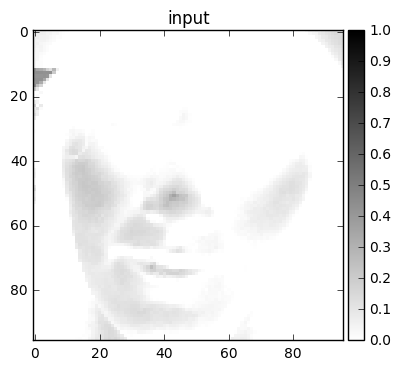

In [32]:
import matplotlib.pyplot as pl
%matplotlib inline
i = 12

# Visualize the first layer of convolutions on an input image
sample = X_test[i:i+1]

pl.figure()
pl.title('input')
nice_imshow(pl.gca(), np.squeeze(sample), vmin=0, vmax=1, cmap=cm.binary)

In [33]:
import numpy.ma as ma
def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    nimgs = imgs.shape[0]
    imshape = imgs.shape[1:]
    
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in xrange(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[i]
    return mosaic

#pl.imshow(make_mosaic(np.random.random((9, 10, 10)), 3, 3, border=1))

In [ ]:
# Visualize weights
W = model.layers[1].W.get_value(borrow=True)
W = np.squeeze(W)
print("W shape : ", W.shape)

pl.figure(figsize=(15, 15))
pl.title('conv4 weights')
nice_imshow(pl.gca(), make_mosaic(W, 8, 8), cmap=cm.binary)

('C1 shape : ', (32, 94, 94))


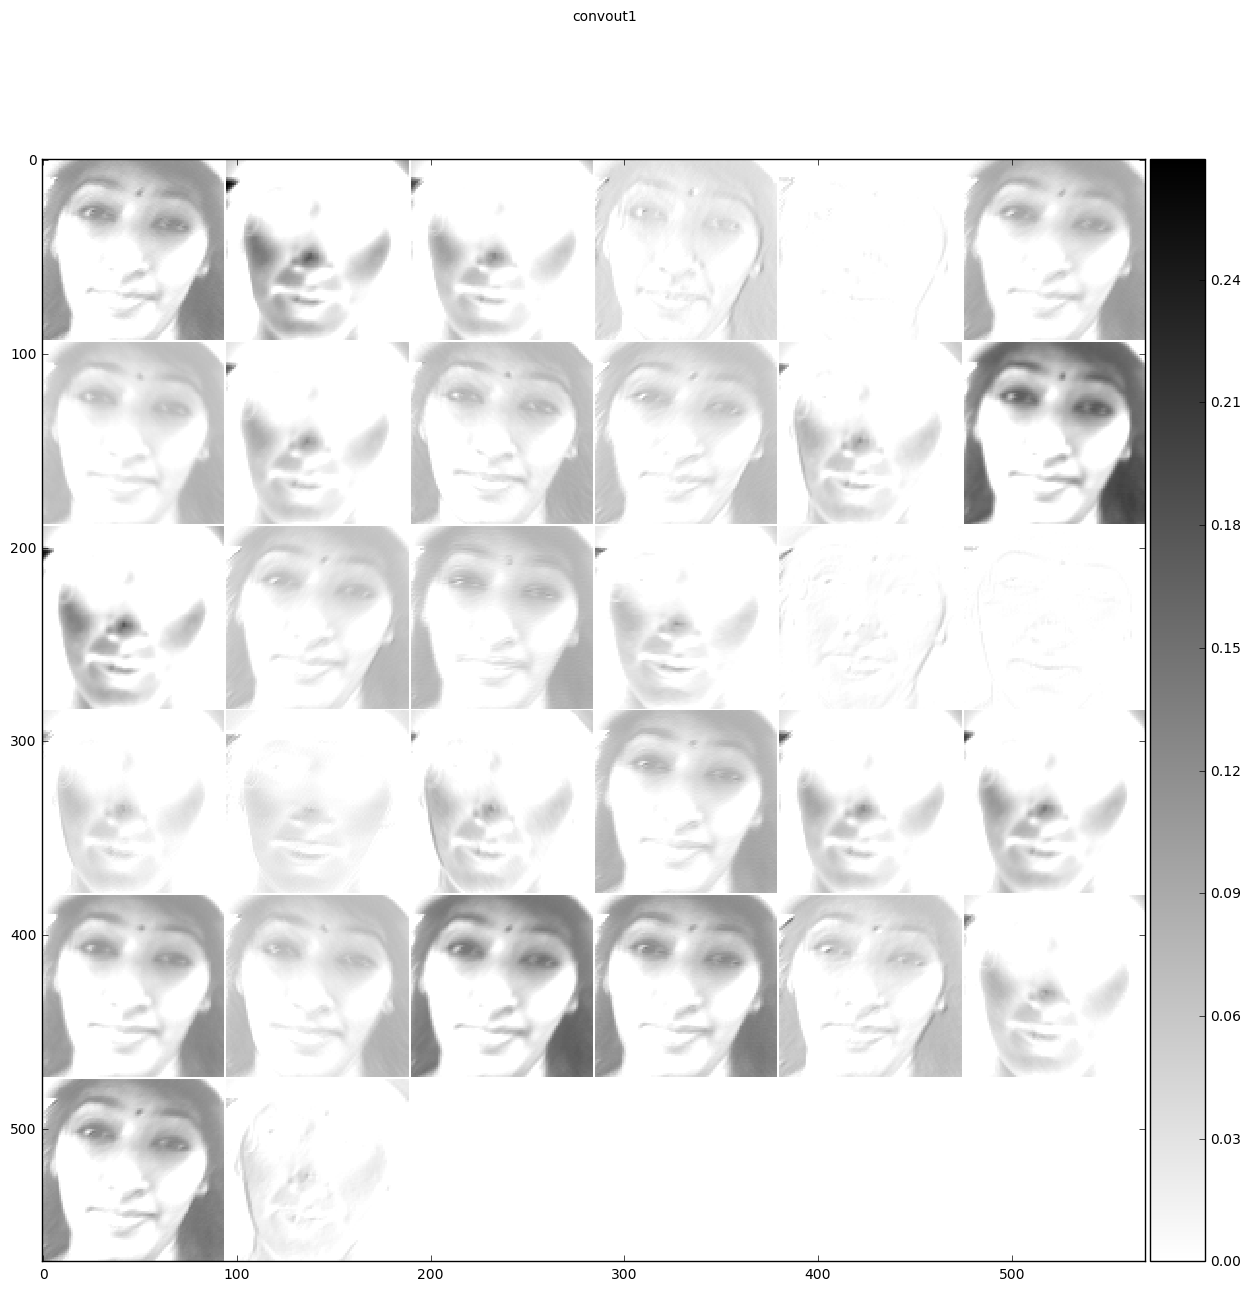

In [41]:
# Visualize convolution result (after activation)
C1 = convout1_f(sample.astype(np.float32).reshape(-1,1,96,96))
C1 = np.squeeze(C1)
print("C1 shape : ", C1.shape)

pl.figure(figsize=(15, 15))
pl.suptitle('convout1')
nice_imshow(pl.gca(), make_mosaic(C1, 6, 6), cmap=cm.binary)

('C2 shape : ', (32, 92, 92))


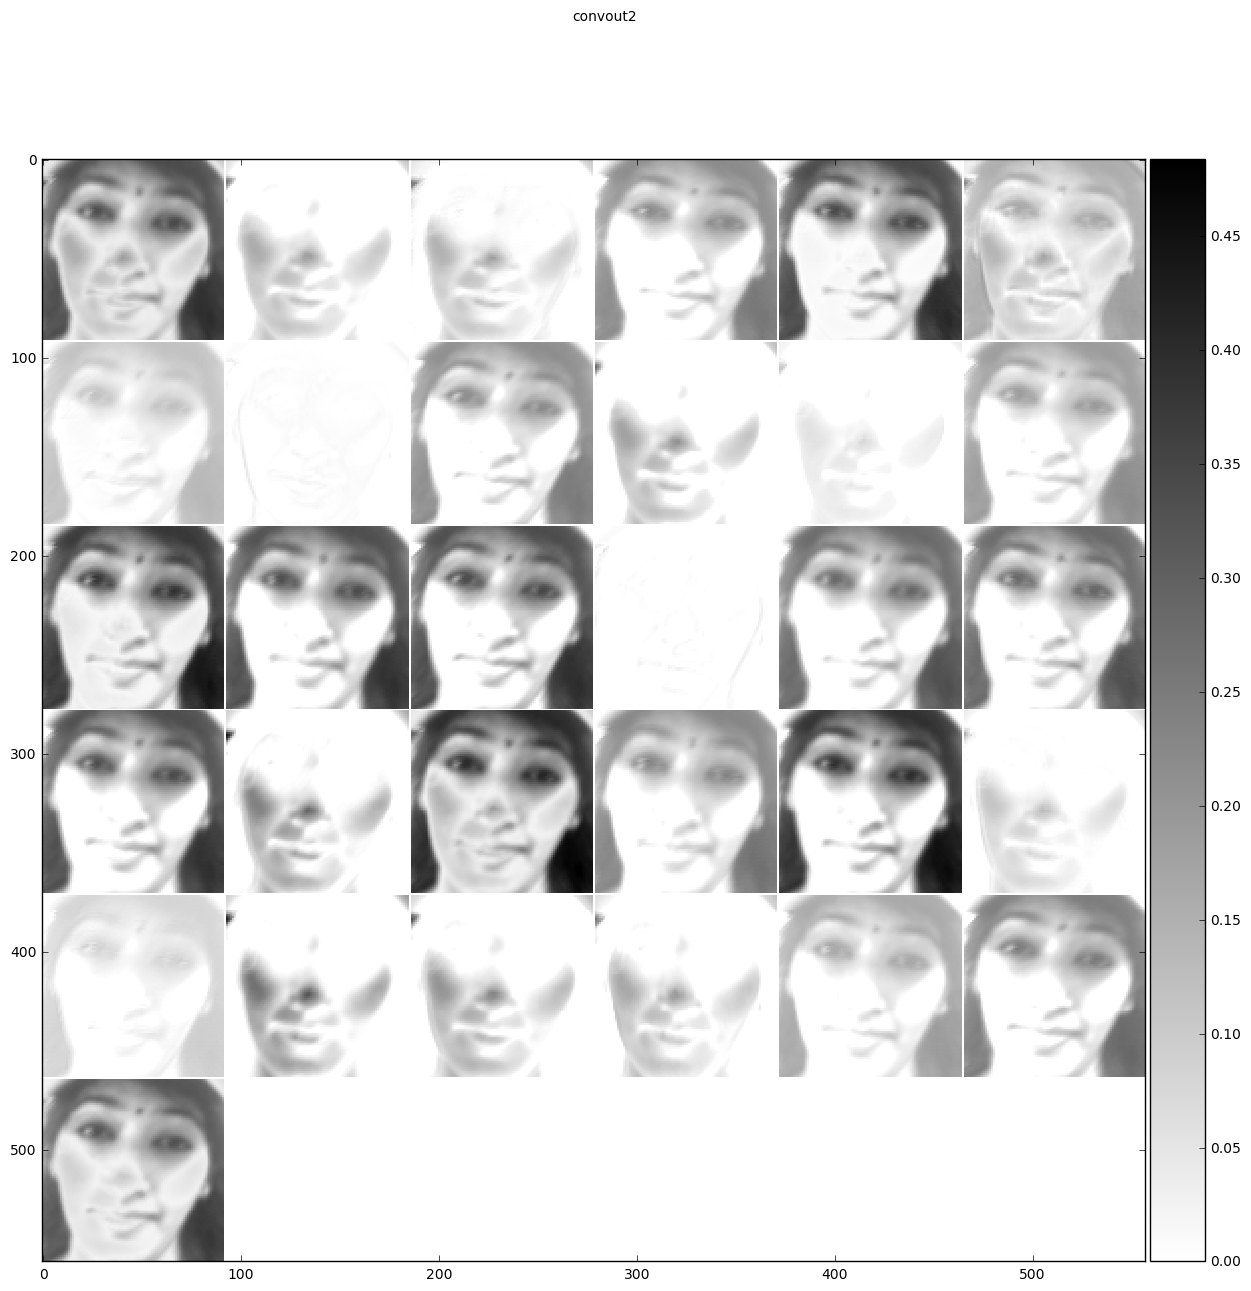

In [42]:
# Visualize convolution result (after activation)
C2 = convout2_f(sample.astype(np.float32).reshape(-1,1,96,96))
C2 = np.squeeze(C2)
print("C2 shape : ", C2.shape)

pl.figure(figsize=(15, 15))
pl.suptitle('convout2')
nice_imshow(pl.gca(), make_mosaic(C2, 6, 6), cmap=cm.binary)

('C3 shape : ', (64, 44, 44))


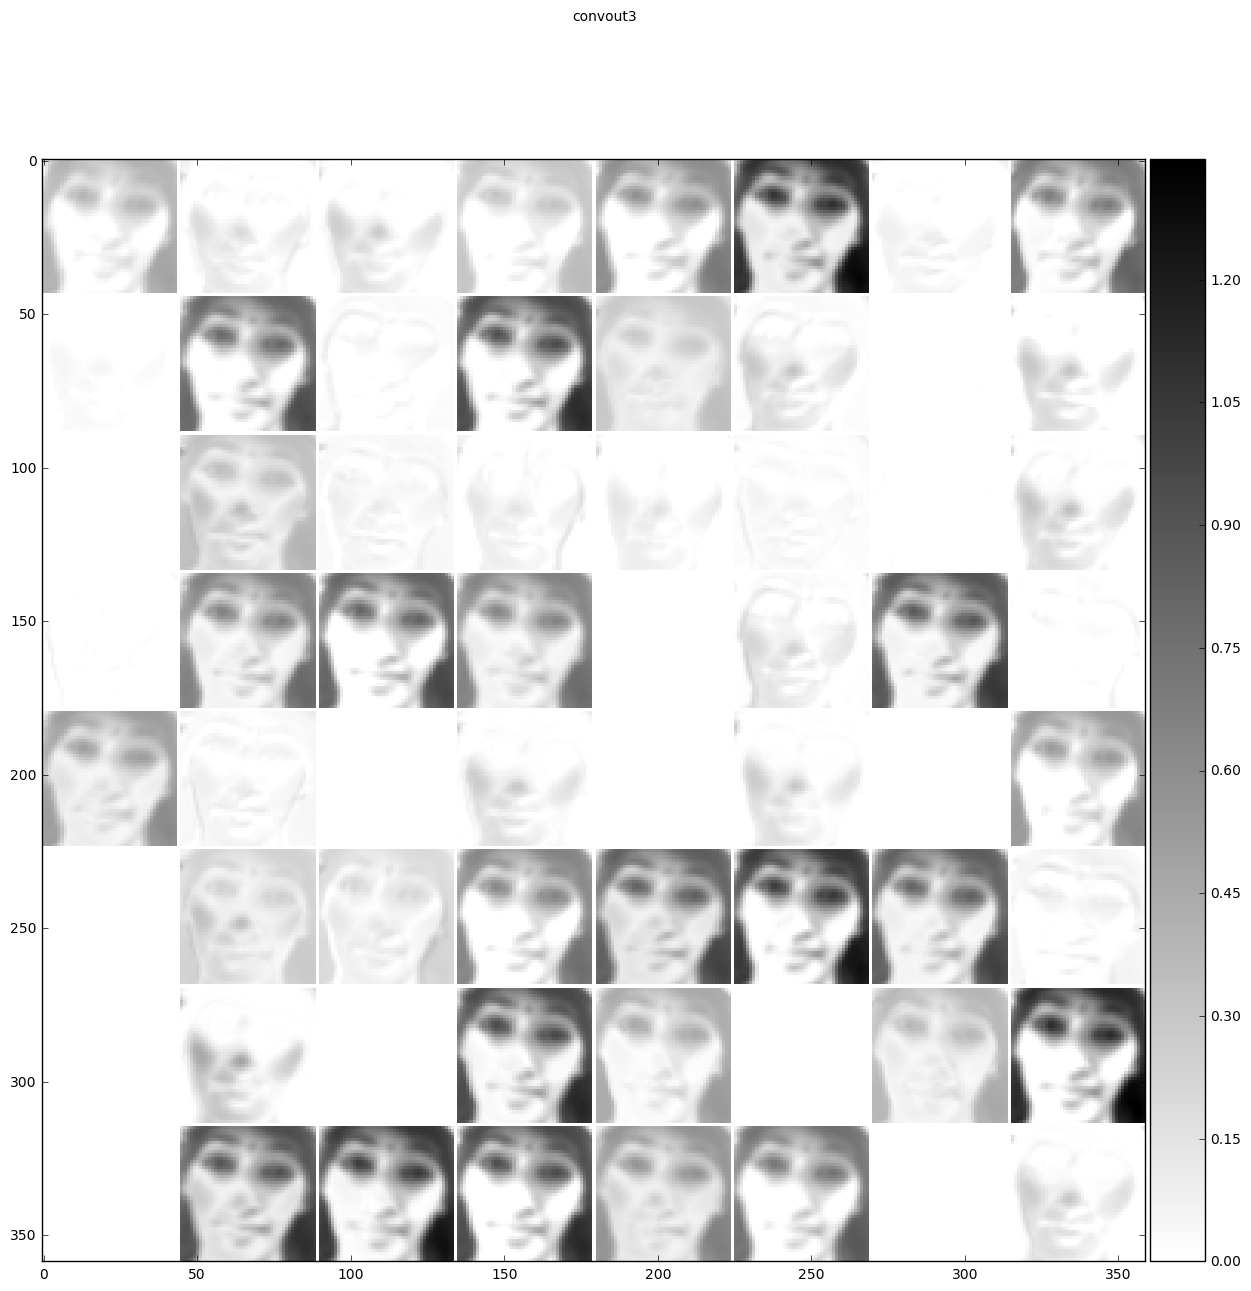

In [46]:
# Visualize convolution result (after activation)
C3 = convout3_f(sample.astype(np.float32).reshape(-1,1,96,96))
C3 = np.squeeze(C3)
print("C3 shape : ", C3.shape)

pl.figure(figsize=(15, 15))
pl.suptitle('convout3')
nice_imshow(pl.gca(), make_mosaic(C3, 8, 8), cmap=cm.binary)

('C4 shape : ', (64, 42, 42))


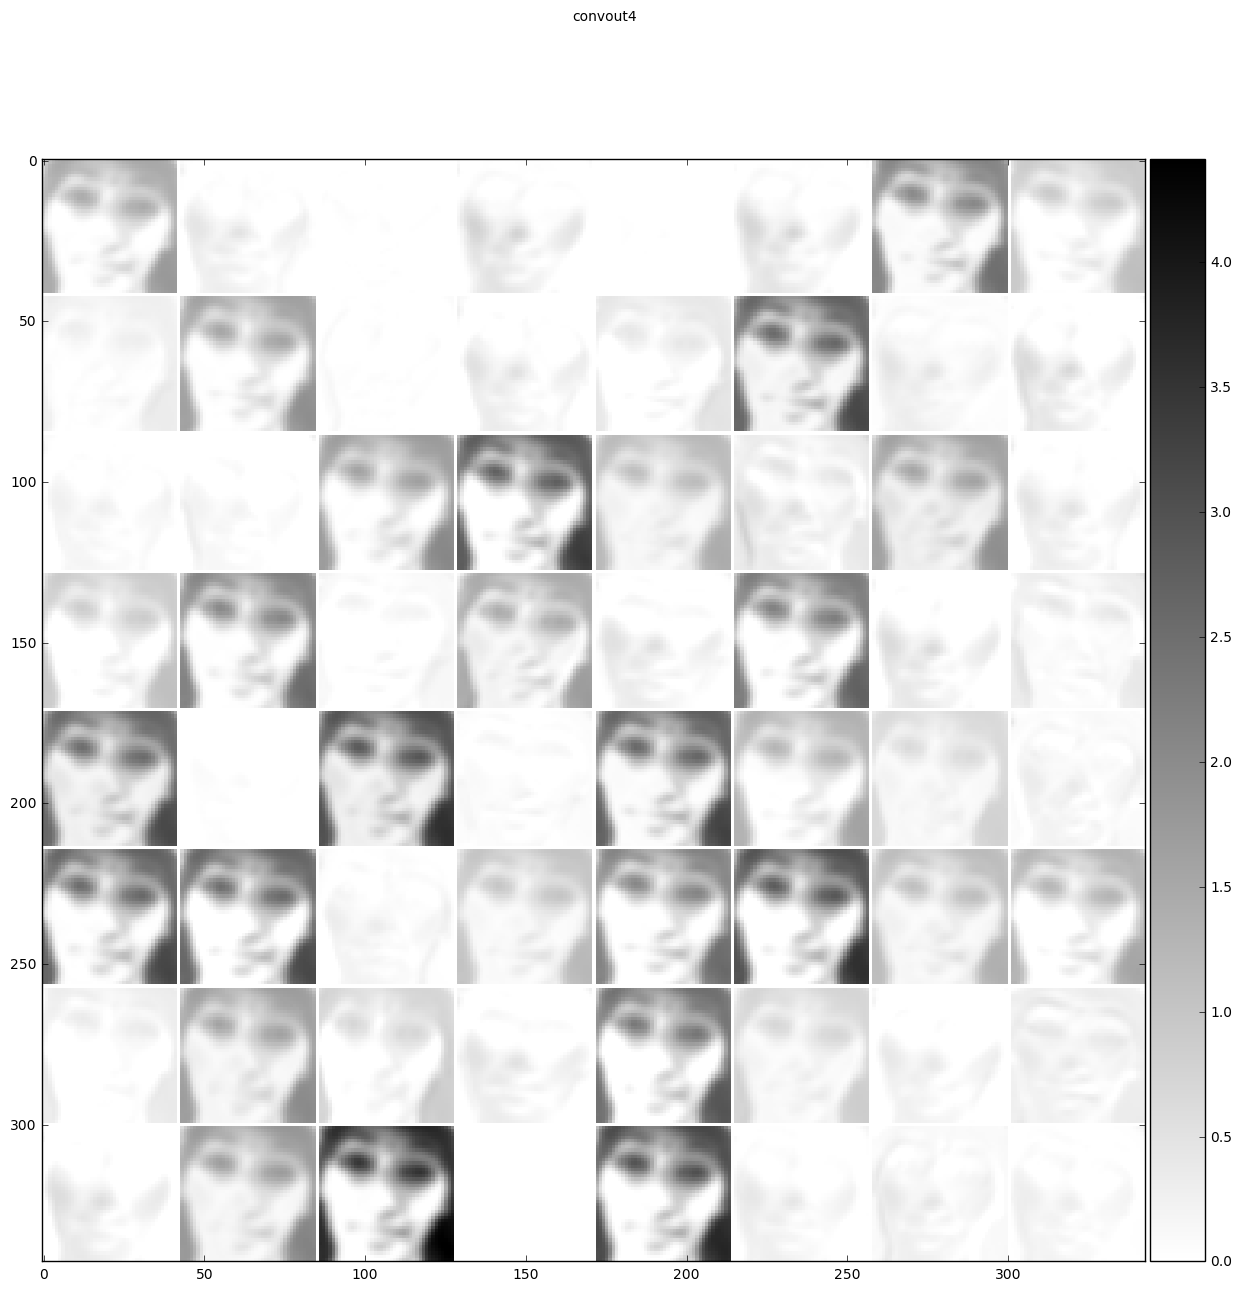

In [47]:
# Visualize convolution result (after activatio3)
C4 = convout4_f(sample.astype(np.float32).reshape(-1,1,96,96))
C4 = np.squeeze(C4)
print("C4 shape : ", C4.shape)

pl.figure(figsize=(15, 15))
pl.suptitle('convout4')
nice_imshow(pl.gca(), make_mosaic(C4, 8, 8), cmap=cm.binary)